In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("wine.csv")

# Task 1: Exploratory Data Analysis (EDA):

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
data.shape

(178, 14)

In [ ]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.duplicated().sum()

0

**inferences**
  - no null values present in data
  - all of the data or columns are of numerical
  - no duplicated data found

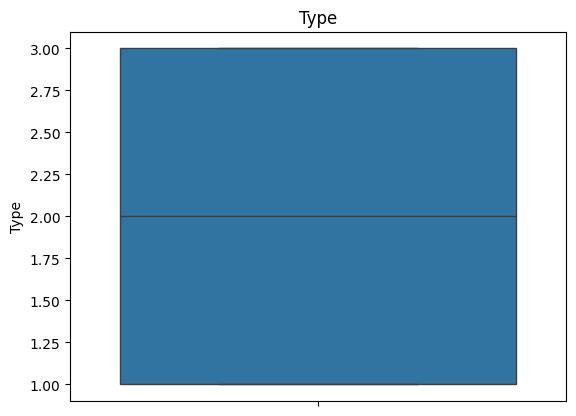

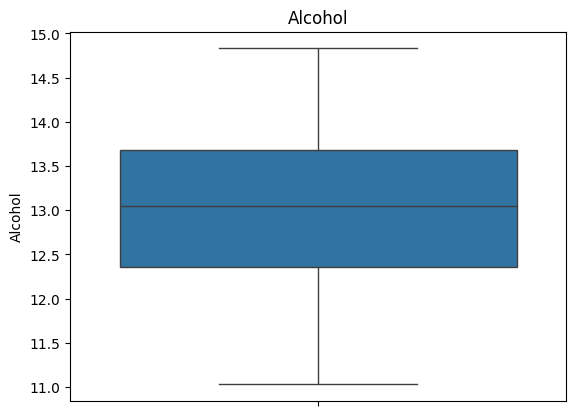

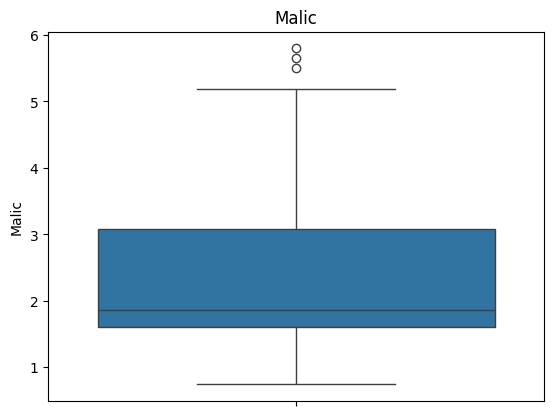

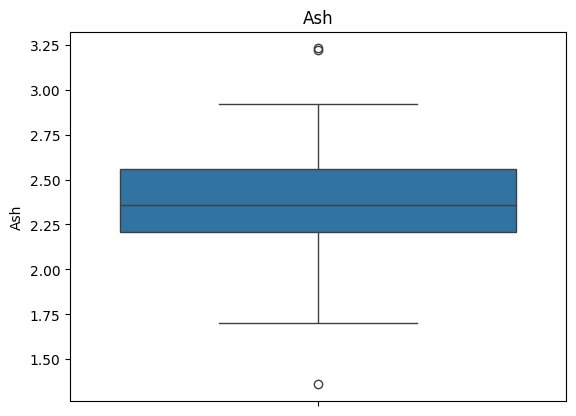

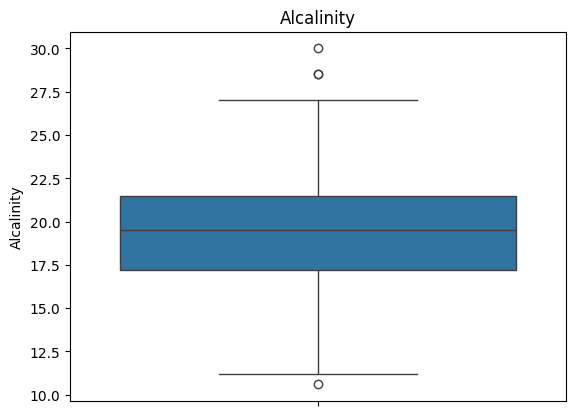

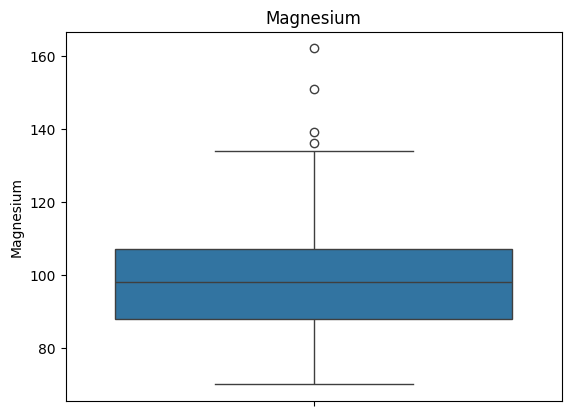

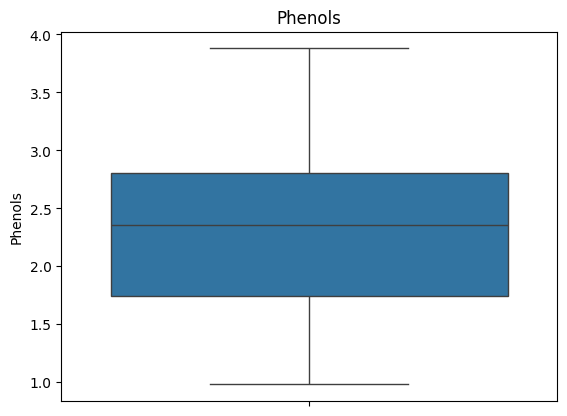

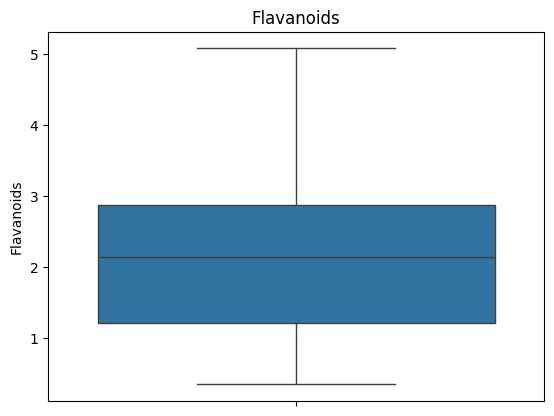

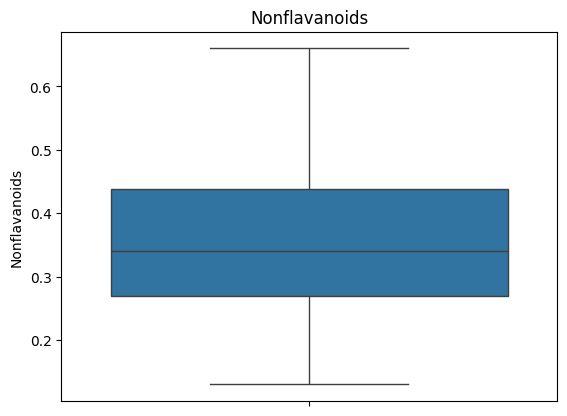

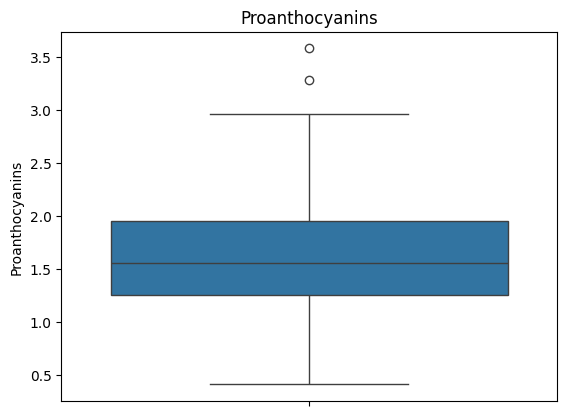

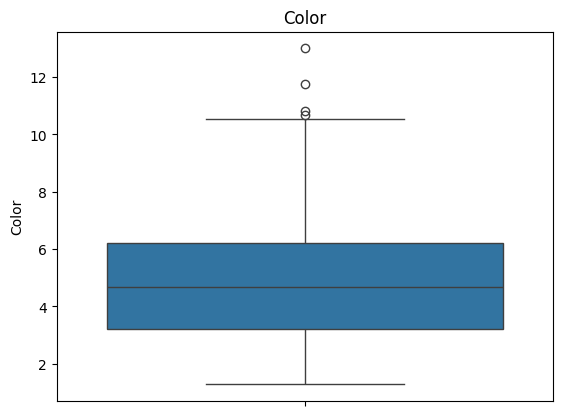

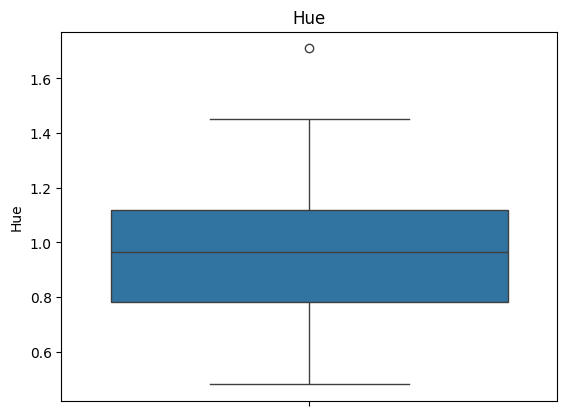

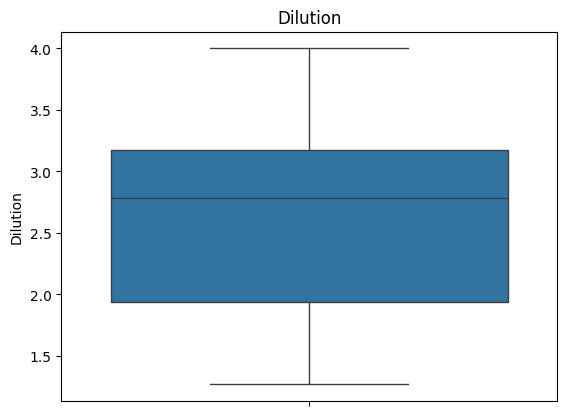

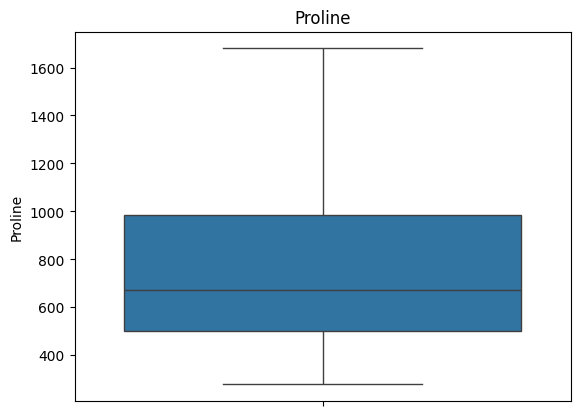

In [ ]:
for column in data.columns:
  plt.figure()
  sns.boxplot(data[column])
  plt.title(column)
  plt.show()

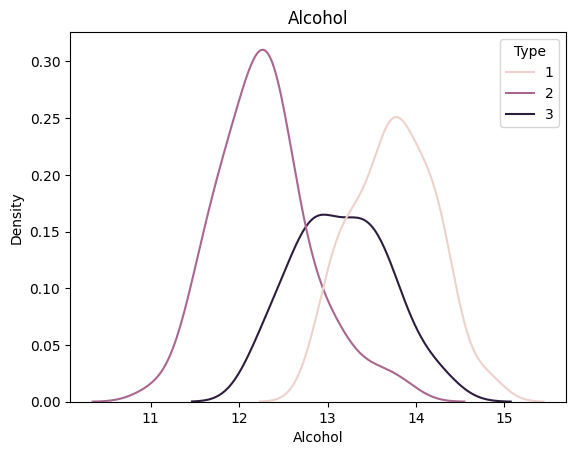

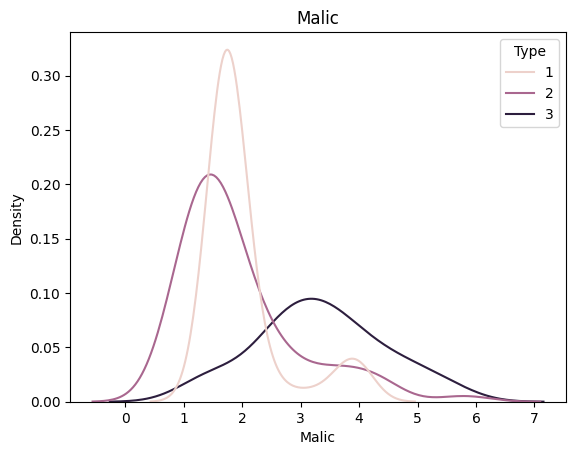

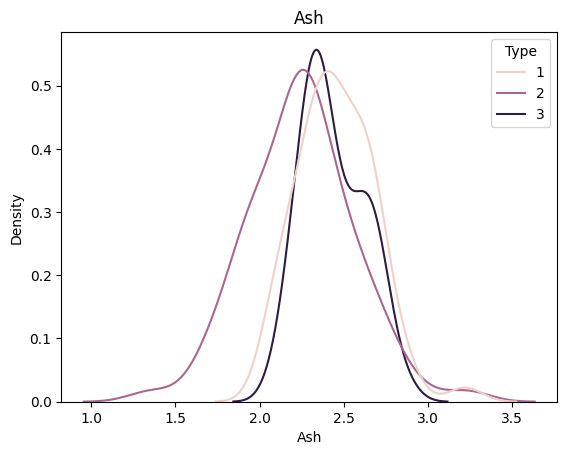

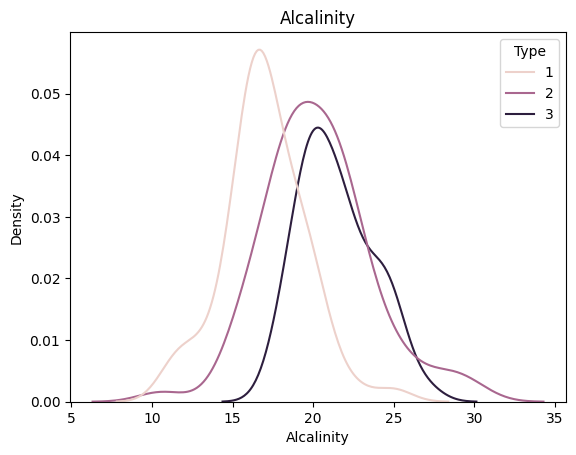

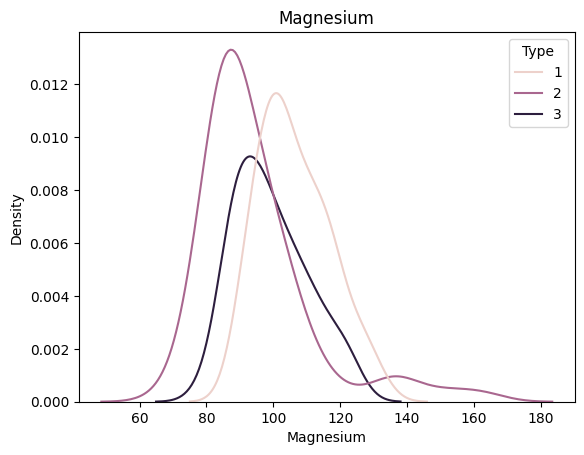

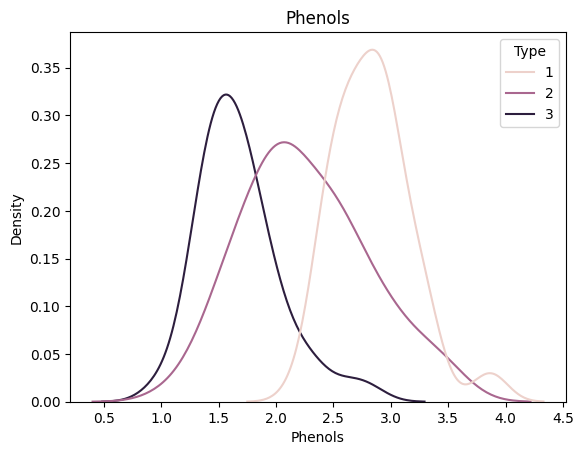

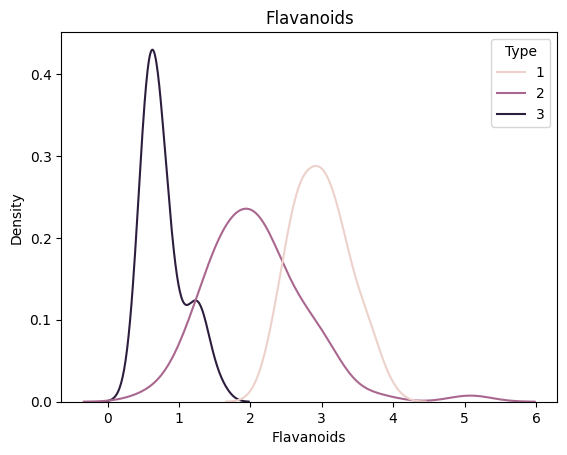

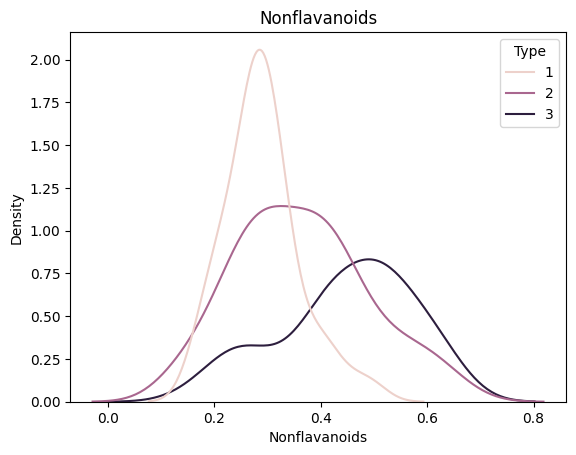

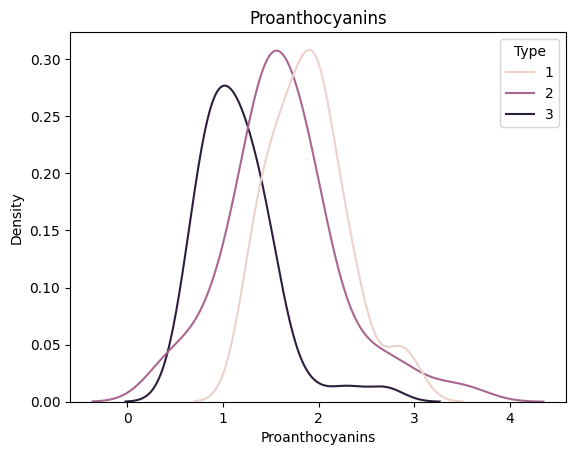

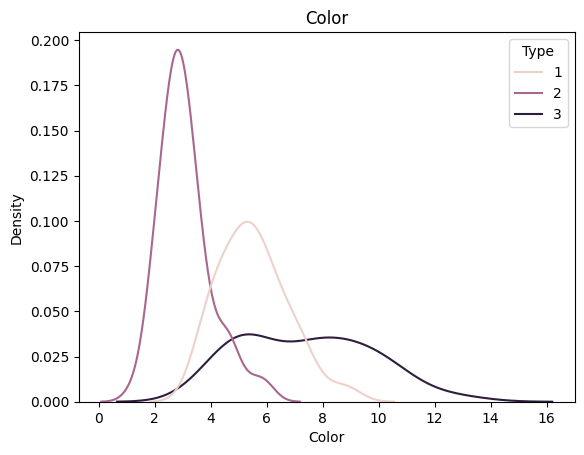

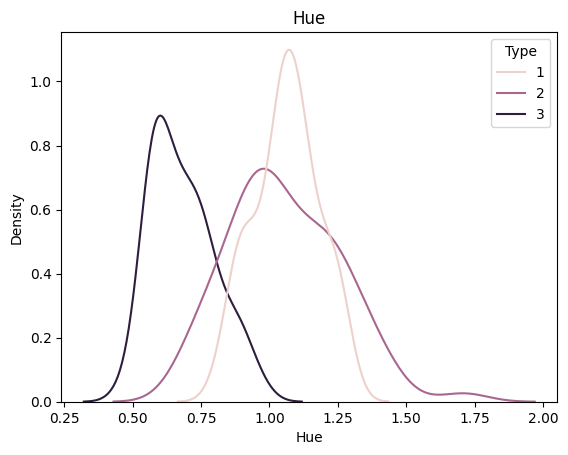

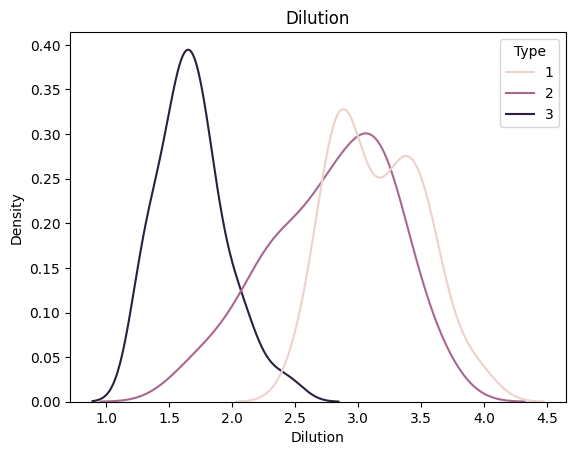

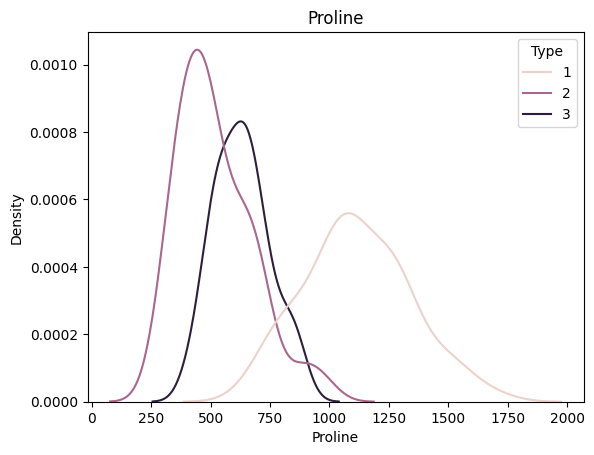

In [ ]:
#density plot
col=data.drop('Type',axis=1)
for column in col.columns:
  plt.figure()
  sns.kdeplot(x=col[column],hue=data['Type'])
  plt.title(column)
  plt.show()

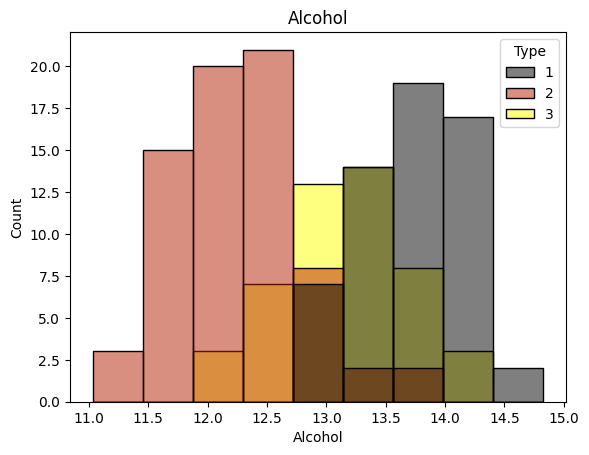

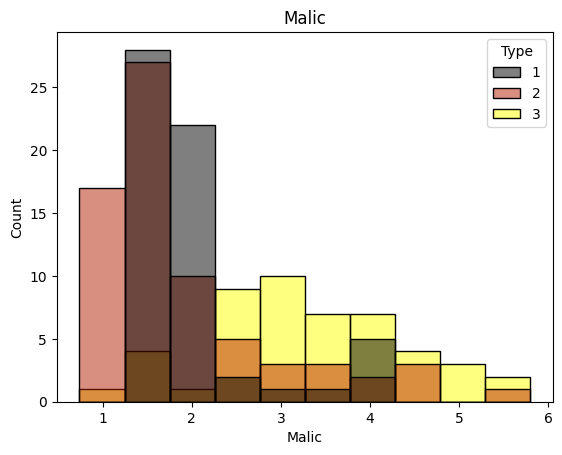

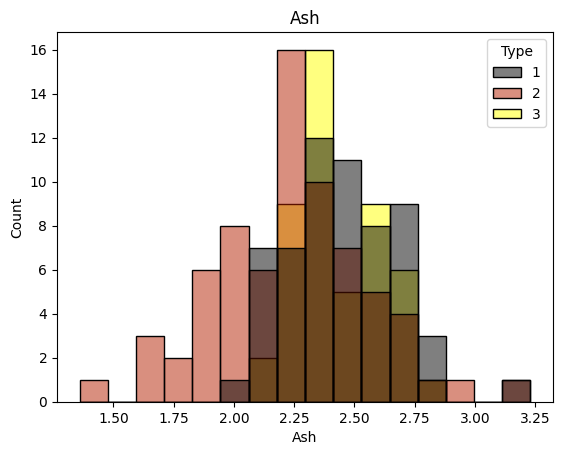

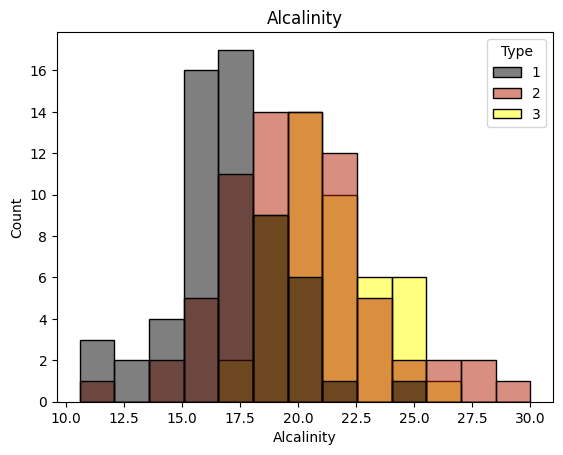

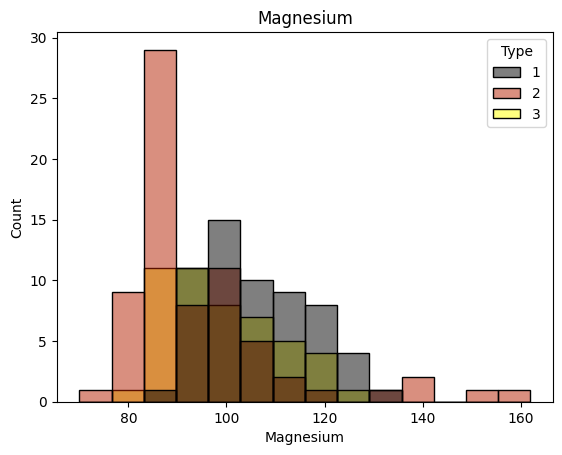

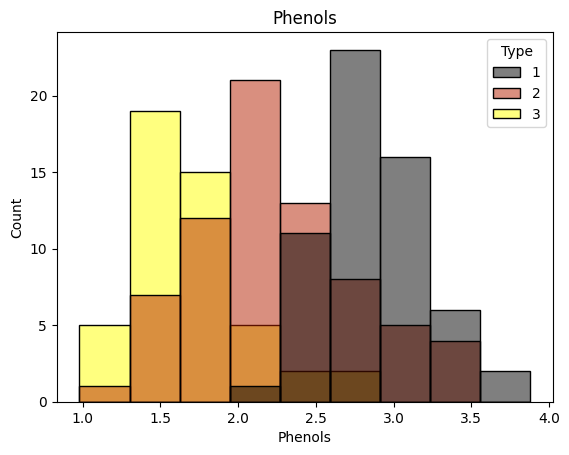

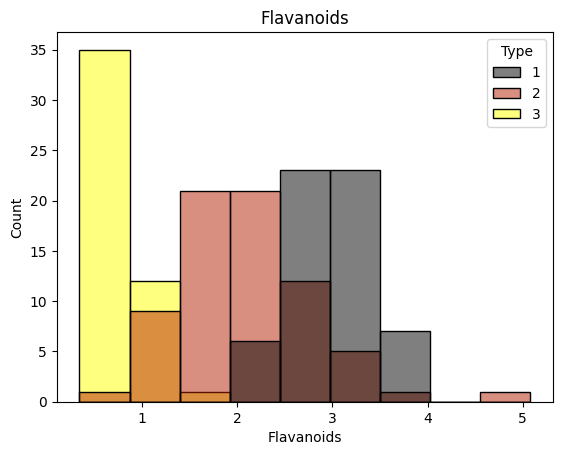

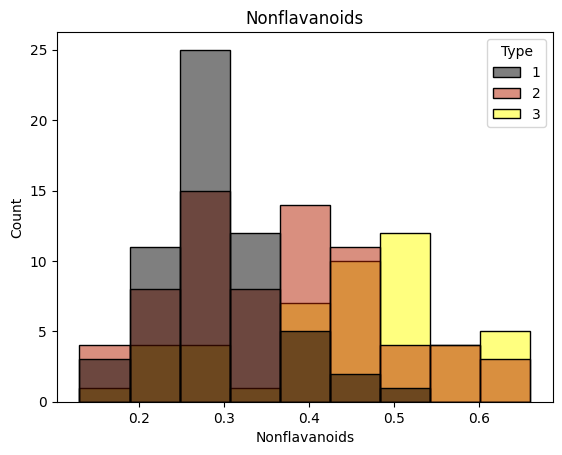

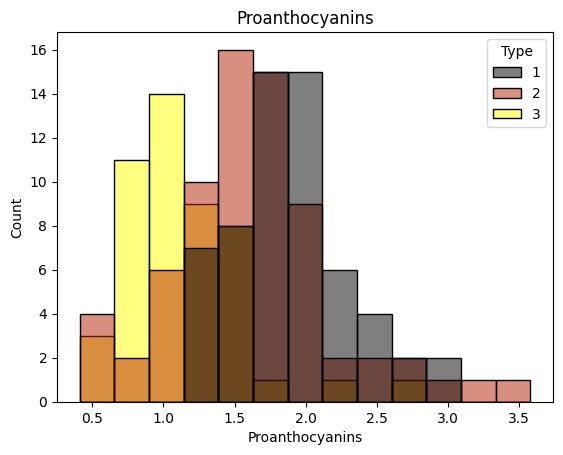

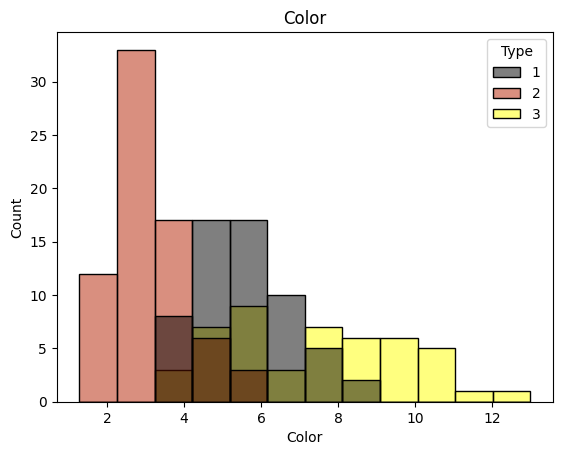

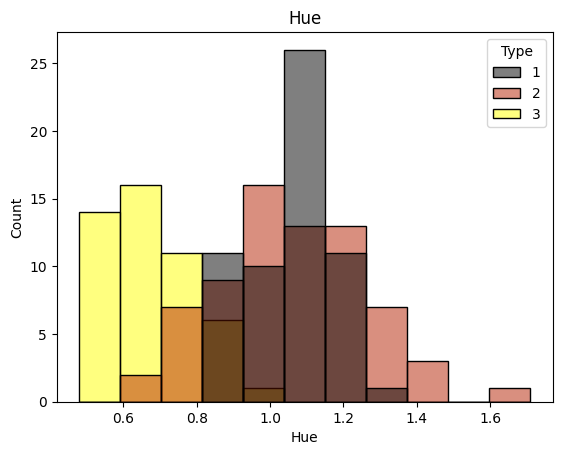

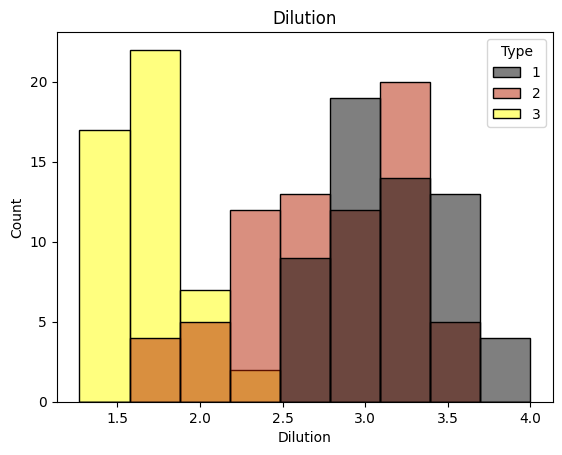

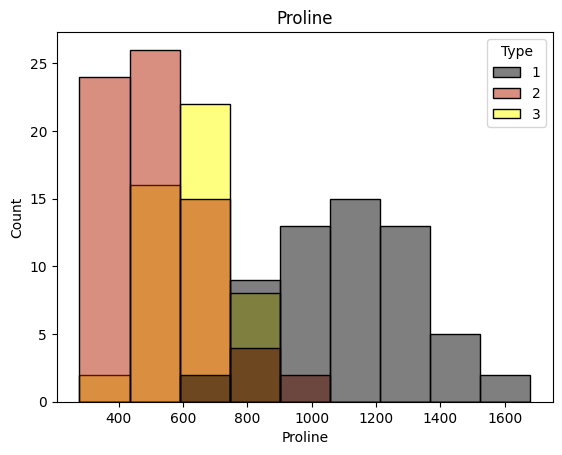

In [ ]:
#histogram
plt.figure()
for column in col.columns:
  sns.histplot(x=col[column],hue=data['Type'],palette="gnuplot")
  plt.title(column)
  plt.show()

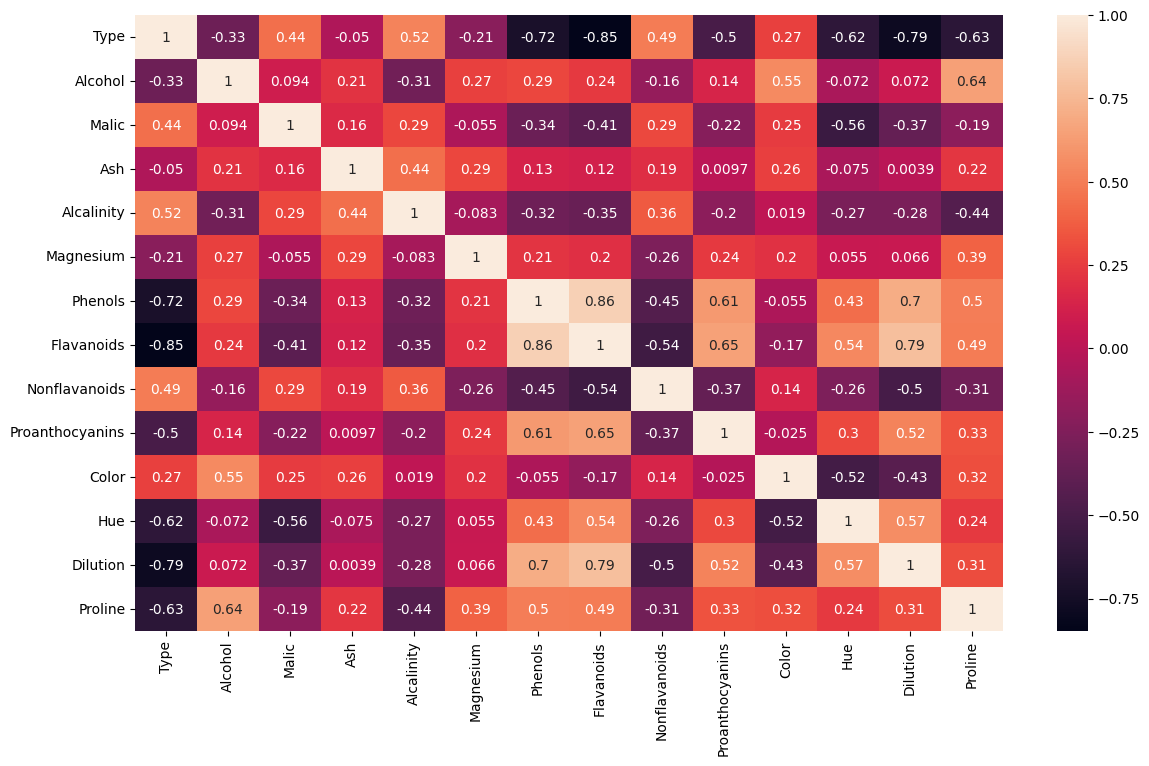

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Task 2: Dimensionality Reduction with PCA:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
SS=StandardScaler()
scaled_data=SS.fit_transform(data.drop('Type',axis=1))

In [ ]:
pca=PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
evr=pca.explained_variance_ratio_

In [ ]:
len(evr)

13

In [ ]:
cumulative_var=evr.cumsum()

In [ ]:
cumulative_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

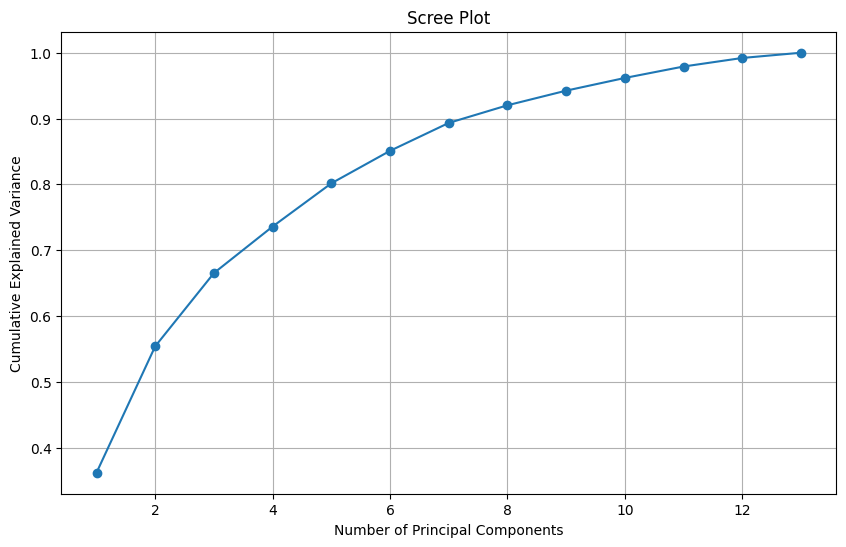

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(evr) + 1),cumulative_var,marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
n_comp = np.argmax(cumulative_var >= 0.75) + 1

In [ ]:
n_comp

5

In [ ]:
pca=PCA(n_components=n_comp)
pca_data=pca.fit_transform(scaled_data)

# Task 3: Clustering with Original Data:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
og_cluster=kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


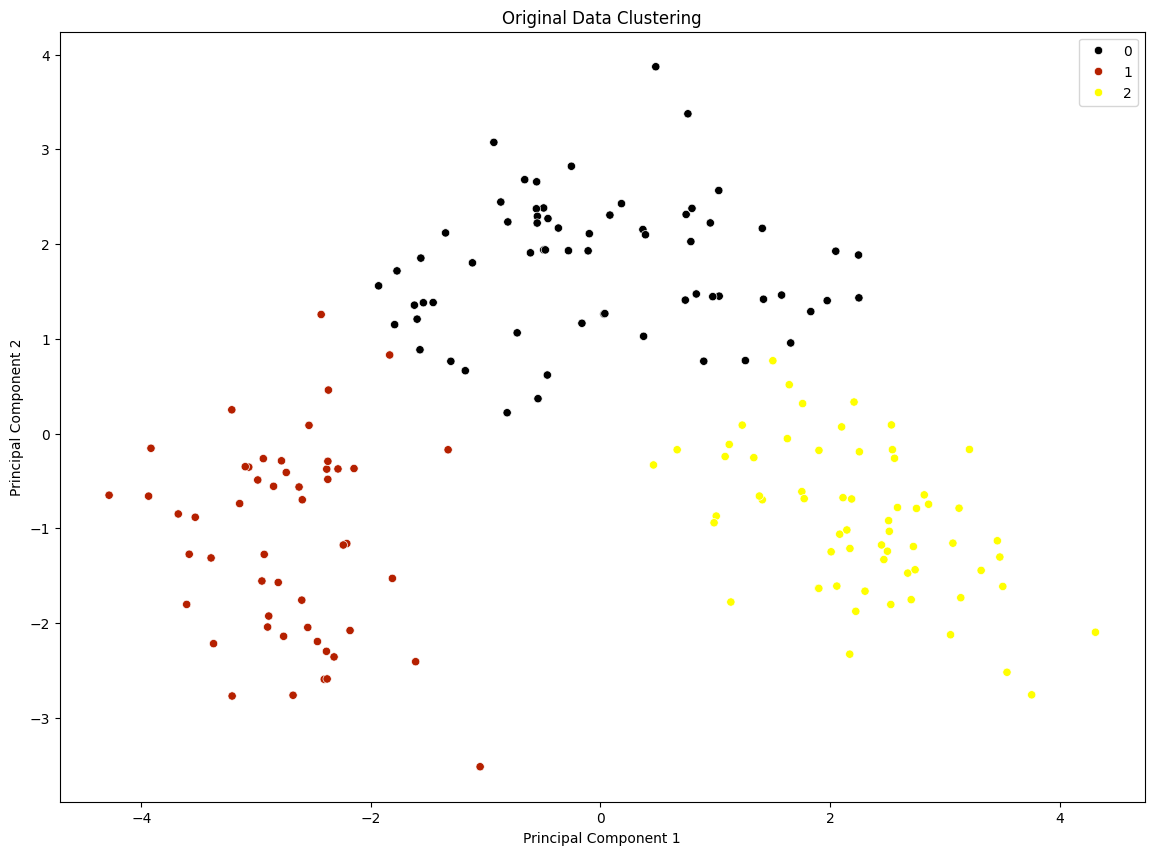

In [ ]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=og_cluster,palette='gnuplot')
plt.title('Original Data Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
og_ss=silhouette_score(scaled_data,og_cluster)

In [ ]:
og_ss

0.2848589191898987

In [ ]:
og_dbs=davies_bouldin_score(scaled_data,og_cluster)

In [ ]:
og_dbs

1.3891879777181648

# Task 4: Clustering with PCA Data:

In [ ]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


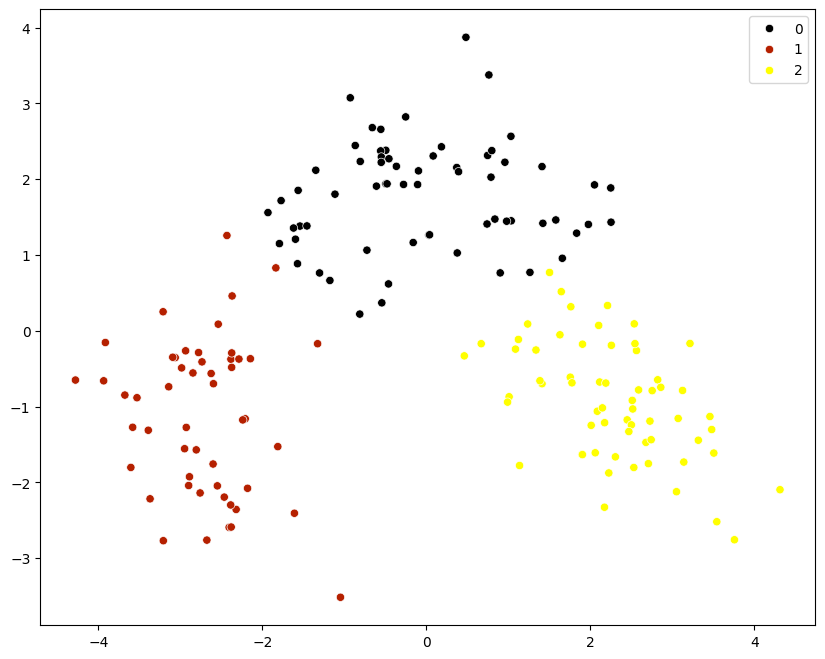

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],hue=pca_clusters,palette='gnuplot')
plt.show()

In [ ]:
pca_ss=silhouette_score(pca_data,pca_clusters)

In [ ]:
pca_dbs=davies_bouldin_score(pca_data,pca_clusters)

In [ ]:
print(f"Silhouette Score for PCA Data: {pca_ss}")
print(f"Davies bouldin score for PCA Data: {pca_dbs}")

Silhouette Score for PCA Data: 0.3690763194699231
Davies bouldin score for PCA Data: 1.0932987882612901


# Task 5: Comparison and Analysis:

In [ ]:
#comparing Clustering results
print(f"Silhouette Score for Original Data: {og_ss}")
print(f"Dacies bouldin score for Original Data: {og_dbs}")
print(f"Silhouette Score for PCA Data: {pca_ss}")
print(f"Davies bouldin score for PCA Data: {pca_dbs}")

Silhouette Score for Original Data: 0.2848589191898987
Dacies bouldin score for Original Data: 1.3891879777181648
Silhouette Score for PCA Data: 0.3690763194699231
Davies bouldin score for PCA Data: 1.0932987882612901


From the comparison we can understand that

* by applying PCA(priciple component analysis) we get a better clustering of data it can be identified by looking into silhouette score and davies bouldin score
* the increase in silhouette score indicate better matching with it's own cluster and less matching with neighboring clusters

* decrease in davies boulding score indicates the better the clustering is

## Analyze the trade-offs between using PCA and clustering directly on the original dataset.
- Advantages: Reduces dimensionality, mitigating the curse of dimensionality, may improve clustering performance
- Disadvantages: Potential loss of information, can be computationally expensive


# Task 6: Conclusion and Insights

**Conclusion and Insights:**

  - "In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means
  - We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance

**the practical implications of using PCA and clustering in data analysis.**
- imporved data visualization : PCA can reduce the dimensionality of data which make it easier to visualize and understand patterns in dataset

- noise reduction : PCA can filter out noise and less important information in the dat
a